In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

In [11]:
microdata = pd.read_csv('../data/MICRODADOS_ENEM_2023.csv', sep=';', encoding='latin1', nrows=1000)

In [11]:
items_data = pd.read_csv('../data/ITENS_PROVA_2023.csv', sep=';', encoding='latin1', nrows=1000)

Os arquivos foram salvos em pickle para maior eficiencia de carregamento, evitando travamentos.

In [101]:
microdata.to_pickle('../data/enem_2023.pkl') 
items_data.to_pickle('../data/items_data.pkl')
dict_microdata.to_pickle('../data/dictionary/dict_microdata.pkl')

In [3]:
microdata = pd.read_pickle('../data/enem_2023.pkl')

In [4]:
items_data = pd.read_pickle('../data/items_data.pkl')

In [5]:
dict_microdata = pd.read_pickle('../data/dictionary/dict_microdata.pkl')

Os dados do arquivo de dicionário estão organizados em formato "expandido verticalmente". Isso dificulta o entendimento em análise de dados, portanto é necessário organizar as informações em dicionários para cada variável.

In [13]:
# Dicionarios normalmente tem mais de uma aba, por isso deve-se ler o arquivo da seguinte forma:
dict_xls = pd.ExcelFile('../data/dictionary/Dicionário_Microdados_Enem_2023.xlsx')

In [14]:
# Nome das abas
dict_xls.sheet_names

['MICRODADOS_ENEM_2023', 'ITENS_PROVA_2023']

In [28]:
dict_microdata = pd.read_excel(dict_xls, sheet_name='MICRODADOS_ENEM_2023')
dict_microdata.columns # Percebe-se que o cabeçalho não apresenta os nomes das colunas

Index(['DICIONÁRIO DE VARIÁVEIS - ENEM 2023', 'Unnamed: 1', 'Unnamed: 2',
       'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'],
      dtype='object')

In [6]:
# Verificação dos nomes das colunas
dict_microdata.head(10)

,DICIONÁRIO DE VARIÁVEIS - ENEM 2023,Descrição,Variáveis Categóricas,Categoria,Tamanho,Tipo
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NOME DA VARIÁVEL,Descrição,Variáveis Categóricas,NaN,Tamanho,Tipo
2,NaN,NaN,Categoria,Descrição,NaN,NaN
3,DADOS DO PARTICIPANTE,NaN,NaN,NaN,NaN,NaN
4,NU_INSCRICAO,Número de inscrição1,NaN,NaN,12,Numérica
5,NU_ANO,Ano do Enem,NaN,NaN,4,Numérica
6,TP_FAIXA_ETARIA,Faixa etária2,1,Menor de 17 anos,2,Numérica
7,NaN,NaN,2,17 anos,NaN,NaN
8,NaN,NaN,3,18 anos,NaN,NaN
9,NaN,NaN,4,19 anos,NaN,NaN


O dicionário de microdados está em formato vertical expandido, o que dificulta a leitura. Portanto foi necessário alterá-lo para um dicionário de dicionários.

In [30]:
# Renomeando as colunas do dict
dict_microdata = dict_microdata.rename(columns={
    'Unnamed: 1': 'Descrição',
    'Unnamed: 2': 'Variáveis Categóricas',
    'Unnamed: 3': 'Categoria',
    'Unnamed: 4':  'Tamanho',
    'Unnamed: 5': 'Tipo'
})

In [65]:
dict_microdata.head()

,DICIONÁRIO DE VARIÁVEIS - ENEM 2023,Descrição,Variáveis Categóricas,Categoria,Tamanho,Tipo
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NOME DA VARIÁVEL,Descrição,Variáveis Categóricas,NaN,Tamanho,Tipo
2,NaN,NaN,Categoria,Descrição,NaN,NaN
3,DADOS DO PARTICIPANTE,NaN,NaN,NaN,NaN,NaN
4,NU_INSCRICAO,Número de inscrição1,NaN,NaN,12,Numérica


In [7]:
filtro = dict_microdata['Categoria'].str.contains('Pública',case=False, na=False)

In [8]:
dict_microdata.loc[filtro, ['Categoria','Variáveis Categóricas']]

,Categoria,Variáveis Categóricas
68,Pública,2
217,"Grupo 5: Médico, engenheiro, dentista, psicólo...",E
223,"Grupo 5: Médica, engenheira, dentista, psicólo...",E


In [9]:
microdata.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

In [41]:
filtro_column = dict_microdata['DICIONÁRIO DE VARIÁVEIS - ENEM 2023'].str.contains('CO_MUNICIPIO_ESC', case=False, na=False)

In [42]:
dict_microdata.loc[filtro_column, ['Descrição', 'Categoria']]

,Descrição,Categoria
75,Código do município da escola,NaN


Será feito o mapeamento para as seguintes variáveis categóricas: TP_ENSINO, TP_COR_RACA, TP_LOCALIZACAO

    * Mudar o nome das colunas da tabela de microdados para nomes explicativos

In [8]:
microdata = microdata.rename(columns={
    'NU_ANO': 'Ano do ENEM',
    'TP_FAIXA_ETARIA': 'Faixa etaria',
    'TP_SEXO': 'Sexo',
    'TP_ESTADO_CIVIL': 'Estado civil', 
    'TP_COR_RACA': 'Raca/cor', 
    'TP_NACIONALIDADE': 'Nacionalidade', 
    'TP_ST_CONCLUSAO': 'Situação do Ensino Medio',
    'TP_ANO_CONCLUIU': 'Ano conclusao Ensino Medio', 
    'TP_ESCOLA': 'Escola', 
    'TP_ENSINO': 'Tipo de ensino',
    'IN_TREINEIRO': 'Treineiro',
    'TP_LOCALIZACAO_ESC': 'Local escola', 
    'TP_PRESENCA_CN': 'Presenca C Naturais', 
    'TP_PRESENCA_CH': 'Presenca C Humanas', 
    'TP_PRESENCA_LC': 'Presenca Linguagens',
    'TP_PRESENCA_MT': 'Presenca mat', 
    'NU_NOTA_CN': 'Nota C Naturais', 
    'NU_NOTA_CH': 'Nota C Humanas', 
    'NU_NOTA_LC': 'Nota Linguagens', 
    'NU_NOTA_MT': 'Nota mat',
    'TP_STATUS_REDACAO': 'Situacao redacao',
    'NU_NOTA_REDACAO': 'Nota redacao'
})

In [17]:
microdata_filtered = microdata[['Ano do ENEM','Estado civil','Raca/cor','Sexo','Nacionalidade',
                                'Situação do Ensino Medio','Tipo de ensino','Nota C Naturais',
                                'Nota C Humanas', 'Nota Linguagens', 'Nota mat', 'Situacao redacao', 'Nota redacao']]

In [10]:
microdata.head()

,NU_INSCRICAO,Ano do ENEM,Faixa etaria,Sexo,Estado civil,Raca/cor,Nacionalidade,Situação do Ensino Medio,Ano conclusao Ensino Medio,Escola,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210059085136,2023,14,M,2,1,1,1,17,1,...,C,C,B,B,A,B,B,A,A,B
1,210059527735,2023,12,M,2,1,0,1,16,1,...,B,A,B,B,A,A,C,A,D,B
2,210061103945,2023,6,F,1,1,1,1,0,1,...,B,A,A,B,A,A,A,A,A,B
3,210060214087,2023,2,F,1,3,1,2,0,2,...,A,A,A,B,A,A,D,A,A,B
4,210059980948,2023,3,F,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,A,A


In [18]:
microdata_filtered.head()

,Ano do ENEM,Estado civil,Raca/cor,Sexo,Nacionalidade,Situação do Ensino Medio,Tipo de ensino,Nota C Naturais,Nota C Humanas,Nota Linguagens,Nota mat,Situacao redacao,Nota redacao
0,2023,2,1,M,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023,2,1,M,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023,1,1,F,1,1,NaN,502.0,498.9,475.6,363.2,1.0,700.0
3,2023,1,3,F,1,2,1.0,459.0,508.5,507.2,466.7,1.0,880.0
4,2023,1,3,F,1,2,1.0,402.5,379.2,446.9,338.3,1.0,560.0


In [19]:
microdata_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Ano do ENEM               1000 non-null   int64  
 1   Estado civil              1000 non-null   int64  
 2   Raca/cor                  1000 non-null   int64  
 3   Sexo                      1000 non-null   object 
 4   Nacionalidade             1000 non-null   int64  
 5   Situação do Ensino Medio  1000 non-null   int64  
 6   Tipo de ensino            233 non-null    float64
 7   Nota C Naturais           677 non-null    float64
 8   Nota C Humanas            701 non-null    float64
 9   Nota Linguagens           701 non-null    float64
 10  Nota mat                  677 non-null    float64
 11  Situacao redacao          701 non-null    float64
 12  Nota redacao              701 non-null    float64
dtypes: float64(7), int64(5), object(1)
memory usage: 101.7+ KB


Colunas que terão dados faltantes preenchidos: **Nota redacao**, **Situacao redacao**, **Nota mat**, **Nota Linguagens**, **Nota C Humanas**, **Nota C Humanas**.
A coluna **Tipo de ensino** apresenta muitos dados faltantes (mais de 50%), portanto será apagada.

In [24]:
microdata_filtered = microdata_filtered.drop(columns=['Tipo de ensino'])

In [26]:
microdata_filtered.columns

Index(['Ano do ENEM', 'Estado civil', 'Raca/cor', 'Sexo', 'Nacionalidade',
       'Situação do Ensino Medio', 'Nota C Naturais', 'Nota C Humanas',
       'Nota Linguagens', 'Nota mat', 'Situacao redacao', 'Nota redacao'],
      dtype='object')

Ao usar "fillna" para apenas uma coluna, um aviso é gerado. Deve-se evitar o inplace=True nesses casos

In [27]:
# Preenchimento dos dados faltantes
microdata_filtered['Nota C Naturais'].fillna(microdata_filtered['Nota C Naturais'].median(), inplace=True)

/tmp/ipykernel_2872/1306772506.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  microdata_filtered['Nota C Naturais'].fillna(microdata_filtered['Nota C Naturais'].median(), inplace=True)


In [28]:
microdata_filtered['Nota C Naturais'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: Nota C Naturais
Non-Null Count  Dtype  
--------------  -----  
1000 non-null   float64
dtypes: float64(1)
memory usage: 7.9 KB


O exemplo acima deu certo, porém não é indicado

In [30]:
microdata_filtered.fillna({'Nota C Humanas': microdata_filtered['Nota C Humanas'].median(),
                          'Nota Linguagens': microdata_filtered['Nota Linguagens'].median(),
                          'Nota mat': microdata_filtered['Nota mat'].median(),
                          'Situacao redacao': microdata_filtered['Situacao redacao'].median(),
                          'Nota redacao': microdata_filtered['Nota redacao'].median()}, inplace=True)

In [31]:
microdata_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Ano do ENEM               1000 non-null   int64  
 1   Estado civil              1000 non-null   int64  
 2   Raca/cor                  1000 non-null   int64  
 3   Sexo                      1000 non-null   object 
 4   Nacionalidade             1000 non-null   int64  
 5   Situação do Ensino Medio  1000 non-null   int64  
 6   Nota C Naturais           1000 non-null   float64
 7   Nota C Humanas            1000 non-null   float64
 8   Nota Linguagens           1000 non-null   float64
 9   Nota mat                  1000 non-null   float64
 10  Situacao redacao          1000 non-null   float64
 11  Nota redacao              1000 non-null   float64
dtypes: float64(6), int64(5), object(1)
memory usage: 93.9+ KB


In [32]:
# Verificação de valores duplicados na coluna Ano do ENEM
microdata_filtered['Ano do ENEM'].duplicated().sum()

np.int64(999)

In [33]:
microdata_filtered['Ano do ENEM'].unique()

array([2023])

A coluna "Ano do ENEM" possui o mesmo valor: 2023. Portanto é ineficiente mantê-la no DataFrame

In [34]:
microdata_filtered.drop(columns=['Ano do ENEM'])

,Estado civil,Raca/cor,Sexo,Nacionalidade,Situação do Ensino Medio,Nota C Naturais,Nota C Humanas,Nota Linguagens,Nota mat,Situacao redacao,Nota redacao
0,2,1,M,1,1,498.7,546.1,532.1,512.2,1.0,640.0
1,2,1,M,0,1,498.7,546.1,532.1,512.2,1.0,640.0
2,1,1,F,1,1,502.0,498.9,475.6,363.2,1.0,700.0
3,1,3,F,1,2,459.0,508.5,507.2,466.7,1.0,880.0
4,1,3,F,1,2,402.5,379.2,446.9,338.3,1.0,560.0
...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,F,1,1,550.7,538.3,533.4,640.2,1.0,560.0
996,1,4,F,1,1,445.1,397.2,509.7,338.7,1.0,540.0
997,1,1,F,1,1,480.1,543.9,518.8,427.9,1.0,660.0
998,1,1,F,1,1,498.7,411.6,467.0,512.2,1.0,480.0


Abaixo, o objetivo é identificar outliers com boxplot e scatterplot

{'whiskers': [<matplotlib.lines.Line2D at 0x75aa4cca85b0>,
 'caps': [<matplotlib.lines.Line2D at 0x75aa4ccaa8f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x75aa4cca9d20>],
 'medians': [<matplotlib.lines.Line2D at 0x75aa4ccaabc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x75aa4cca9750>],
 'means': []}

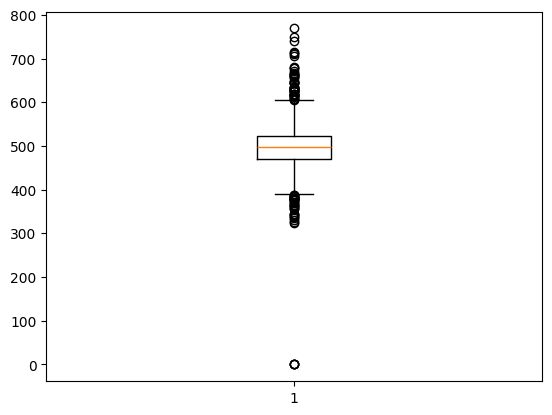

In [36]:
plt.boxplot(data=microdata_filtered, x='Nota C Naturais')

{'whiskers': [<matplotlib.lines.Line2D at 0x75aa4cb51420>,
 'caps': [<matplotlib.lines.Line2D at 0x75aa4cb539d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x75aa4cb51270>],
 'medians': [<matplotlib.lines.Line2D at 0x75aa4cb50700>],
 'fliers': [<matplotlib.lines.Line2D at 0x75aa4cb51990>],
 'means': []}

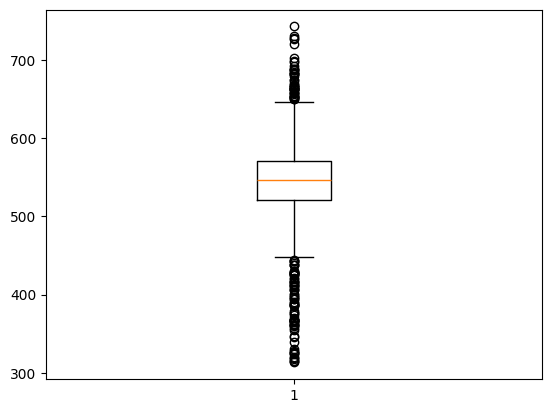

In [38]:
plt.boxplot(data=microdata_filtered, x='Nota C Humanas')